In [130]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import seaborn as sns

In [131]:
df = pd.read_csv('Ship_Performance_Dataset.csv')

In [132]:
df

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,None,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2024-06-02,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,11.607997,2918.395972,239.990359,13.700906,Moderate,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3,74.813114
2732,2024-06-09,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,13.852798,2161.282358,831.355653,14.612775,None,218.309002,21029.021721,374365.370930,64.325916,0.653474,0.891085,2,84.595155
2733,2024-06-16,Container Ship,Short-haul,Steam Turbine,Critical,16.813713,1343.608006,1376.460622,9.306518,None,1630.646419,78883.312529,234120.365052,53.551090,0.594169,0.725404,6,80.975269
2734,2024-06-23,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,23.132643,2028.143572,619.236340,6.623856,Moderate,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2,92.853622


In [133]:
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,None,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


# Описание датасета 

# Числовые признаки:

1. Speed_Over_Ground_knots - Средняя скорость судна над водой (в узлах). Узел - одна морская миля в час (1,852 км/час) или 0,514 м/с (метров в секунду).

2. Engine_Power_kW - Мощность двигателя судна (в киловаттах)

3. Distance_Traveled_nm - Общее расстояние, пройденное судном (в морских милях).

4. Draft_meters - Осадка судна (в метрах). Определяет насколько судно погружено в воду. Знание этого показателя помогает определить, где безопасно плавать, чтобы избежать мелководья, скал, рифов и прочих препятствий

5. Cargo_Weight_tons - Вес перевозимого груза (в тоннах)

6. Operational_Cost_USD - Общая стоимость эксплуатации судна за рейс (в долларах США)

7. Revenue_per_Voyage_USD - Доход, полученный за рейс (в долларах США)

8. Turnaround_Time_hours - Время оборота судна в порту (в часах). Время, к-ое судно проводит в порту между прибытием и отправлением. 

9. Efficiency_nm_per_kWh - Энергоэффективность судна, рассчитанная как кол-во морских миль на килловатт-час

10. Seasonal_Impact_Score - Оценка влияние сезонных условий на эксплуатацию судна (от 0 до 2, где выше сильнее влияние)

11. Weekly_Voyage_Count - Кол-во рейсов, выполненных судном за неделю

12. Average_Load_Percentage - Средний процент загрузки судна (относительно максимальной грузоподъемности)

# Категориальные признаки: 
1. Ship_Type - Тип судна (танкер, контейнеровоз, рыболовное судно, балкер)
2. Route_Type - Тип маршрута судоходства (короткий маршрут, длинный маршрут, трансокеанский)
3. Engine_Type - Тип двигателя судна (дизельный, паровая турбина, тяжелое топливо) 
4. Maintenance_Status - Техническое состояние судна (удовлетворительное, хорошее, критическое)
5. Weather_Condition - Преобладающие погодные условия во время рейсов (спокойно, умеренно, бурно)

# Задача
Оптимизация эффективности судов

Определить ключевые факторы, влияющие на эффективность судов (Efficiency_nm_per_kWh), и предложить рекомендации для ее повышения.

In [134]:
# Размкр датасета
df.shape

(2736, 18)

In [135]:
# Информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2736 non-null   object 
 2   Route_Type               2736 non-null   object 
 3   Engine_Type              2736 non-null   object 
 4   Maintenance_Status       2736 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2736 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [136]:
df.describe()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


In [137]:
# Пропущенные значения
df.isnull().sum()

Date                       0
Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64

In [138]:
df.columns

Index(['Date', 'Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status',
       'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Weather_Condition', 'Cargo_Weight_tons',
       'Operational_Cost_USD', 'Revenue_per_Voyage_USD',
       'Turnaround_Time_hours', 'Efficiency_nm_per_kWh',
       'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage'],
      dtype='object')

In [139]:
# Удаление строк, содержащий 'None' в любом столбце
df = df[df.isin(['None']).any(axis=1)==False]
df

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
5,2023-07-09,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),Fair,18.616196,2171.646567,723.304215,14.916320,Rough,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,2024-05-19,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Good,24.257402,1813.474360,147.964296,10.378736,Moderate,1450.181358,266359.224719,820652.038923,34.433655,0.708172,1.352973,7,51.258697
2730,2024-05-26,Tanker,Long-haul,Diesel,Critical,15.649207,1662.426557,1175.942724,12.564046,Rough,451.670997,393827.995941,567287.169653,22.281638,0.356031,1.079178,2,92.926949
2731,2024-06-02,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,11.607997,2918.395972,239.990359,13.700906,Moderate,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3,74.813114
2734,2024-06-23,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,23.132643,2028.143572,619.236340,6.623856,Moderate,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2,92.853622


In [140]:
cat_col = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition']
for i in cat_col:
    print(f"\nУникальные значения в {i}: ")
    print(df[i].unique())


Уникальные значения в Ship_Type: 
['Fish Carrier' 'Container Ship' 'Bulk Carrier' 'Tanker']

Уникальные значения в Route_Type: 
['Short-haul' 'Long-haul' 'Transoceanic' 'Coastal']

Уникальные значения в Engine_Type: 
['Steam Turbine' 'Diesel' 'Heavy Fuel Oil (HFO)']

Уникальные значения в Maintenance_Status: 
['Good' 'Fair' 'Critical']

Уникальные значения в Weather_Condition: 
['Rough' 'Moderate' 'Calm']


In [141]:
df.nunique()

Date                         57
Ship_Type                     4
Route_Type                    4
Engine_Type                   3
Maintenance_Status            3
Speed_Over_Ground_knots    2127
Engine_Power_kW            2127
Distance_Traveled_nm       2127
Draft_meters               2127
Weather_Condition             3
Cargo_Weight_tons          2127
Operational_Cost_USD       2127
Revenue_per_Voyage_USD     2127
Turnaround_Time_hours      2127
Efficiency_nm_per_kWh      2127
Seasonal_Impact_Score      2127
Weekly_Voyage_Count           9
Average_Load_Percentage    2127
dtype: int64

In [142]:
num_col = df.select_dtypes(include=['number']).columns
num_stats = df[num_col].agg(['min','max','mean','median','std']).T
num_stats

,min,max,mean,median,std
Speed_Over_Ground_knots,10.009756,24.991661,17.606620,17.709557,4.358035
Engine_Power_kW,501.739027,2998.734329,1750.937650,1755.420863,714.510707
Distance_Traveled_nm,50.433150,1998.337057,1038.979949,1037.646044,566.964336
Draft_meters,5.001947,14.989905,9.961135,10.001622,2.843848
Cargo_Weight_tons,50.229624,1999.126697,1033.466859,1045.366596,557.643284
Operational_Cost_USD,10097.439656,499734.867868,257042.246655,259124.728516,140640.549548
Revenue_per_Voyage_USD,50351.814447,999811.927756,523427.583448,524083.139296,269842.456183
Turnaround_Time_hours,12.019909,71.972415,41.773758,41.533238,17.641702
Efficiency_nm_per_kWh,0.100211,1.498191,0.789907,0.774962,0.403117
Seasonal_Impact_Score,0.500004,1.499224,1.001564,1.007639,0.289193


In [143]:
df['Speed_Over_Ground_knots'].corr(df['Operational_Cost_USD'])

-0.0373129489229087

Корреляция -0.0373 между Speed_Over_Ground_knots и Operational_Cost_USD указывает на очень слабую отрицательную зависимость, что значит, что скорость судна практически не влияет на операционные расходы.

# Визуализация данных

In [144]:
sns.set(rc = {'figure.figsize':(15,8)})  

<Axes: title={'center': 'Самый популярный тип корабля'}, xlabel='Ship_Type', ylabel='count'>

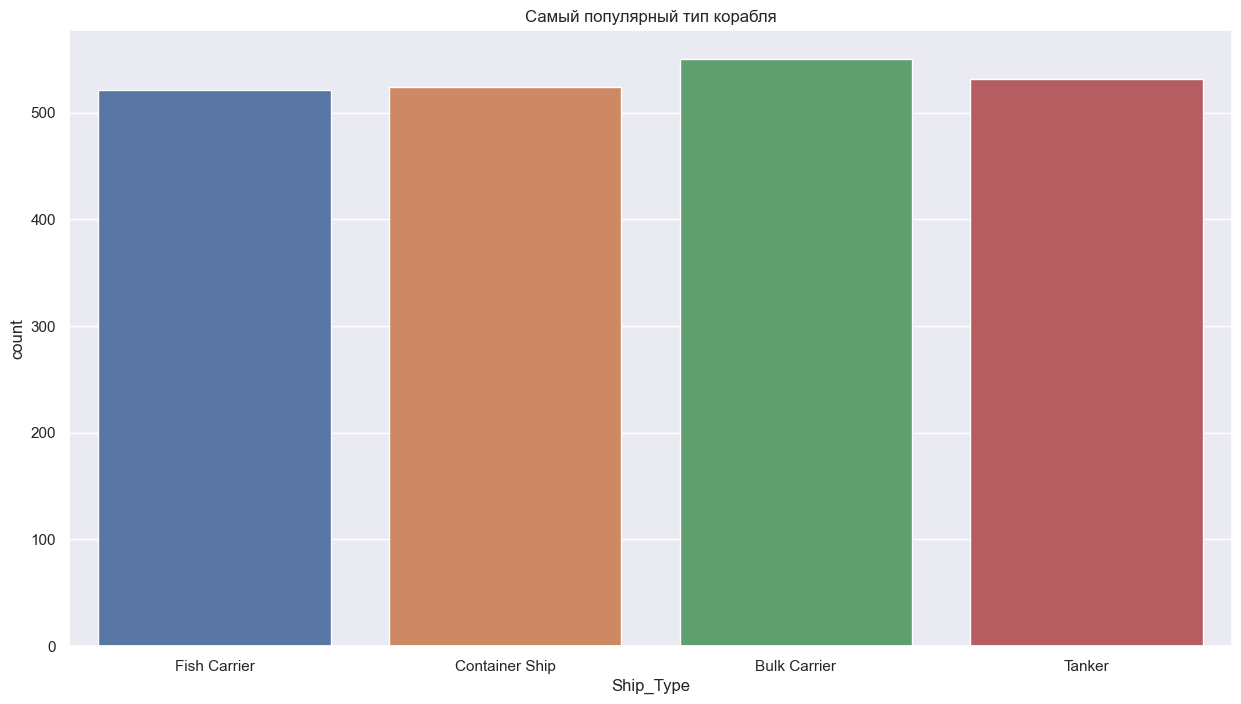

In [145]:
plt.figure()
plt.title('Самый популярный тип корабля')
sns.countplot(df, x='Ship_Type')

In [146]:
df['Ship_Type'].value_counts()

Bulk Carrier      550
Tanker            532
Container Ship    524
Fish Carrier      521
Name: Ship_Type, dtype: int64

<Axes: title={'center': 'Самый популярный тип корабля'}>

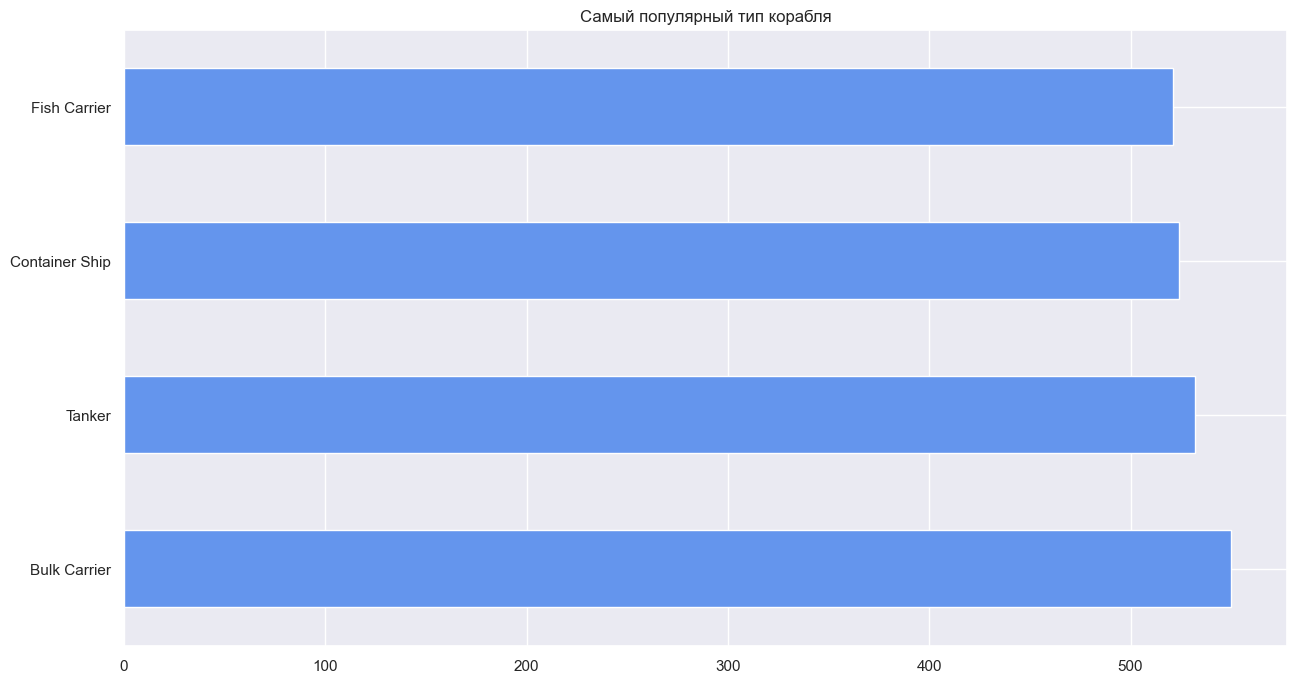

In [147]:
df['Ship_Type'].value_counts().plot(kind='barh', title='Самый популярный тип корабля',color='cornflowerblue')

<Axes: xlabel='Route_Type', ylabel='count'>

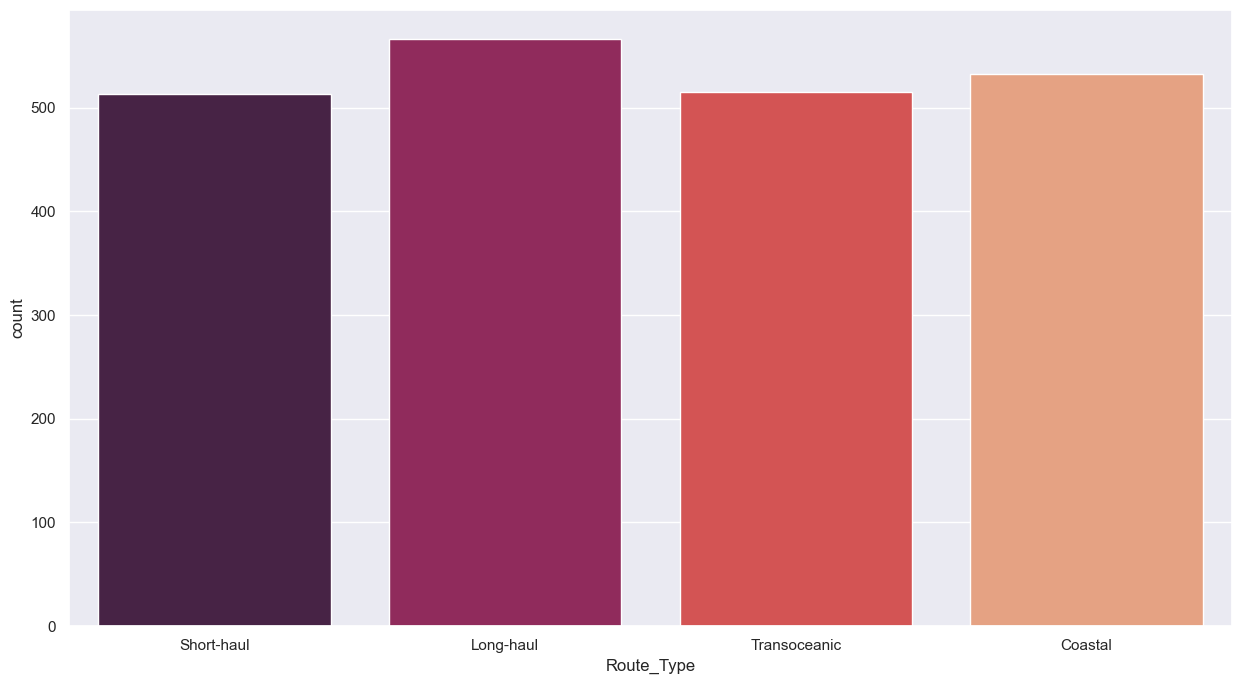

In [148]:
# Тип маршрута судоходства 
sns.countplot(df, x='Route_Type', palette='rocket')

<Axes: title={'center': 'Самый распространенный тип маршрута судоходства '}>

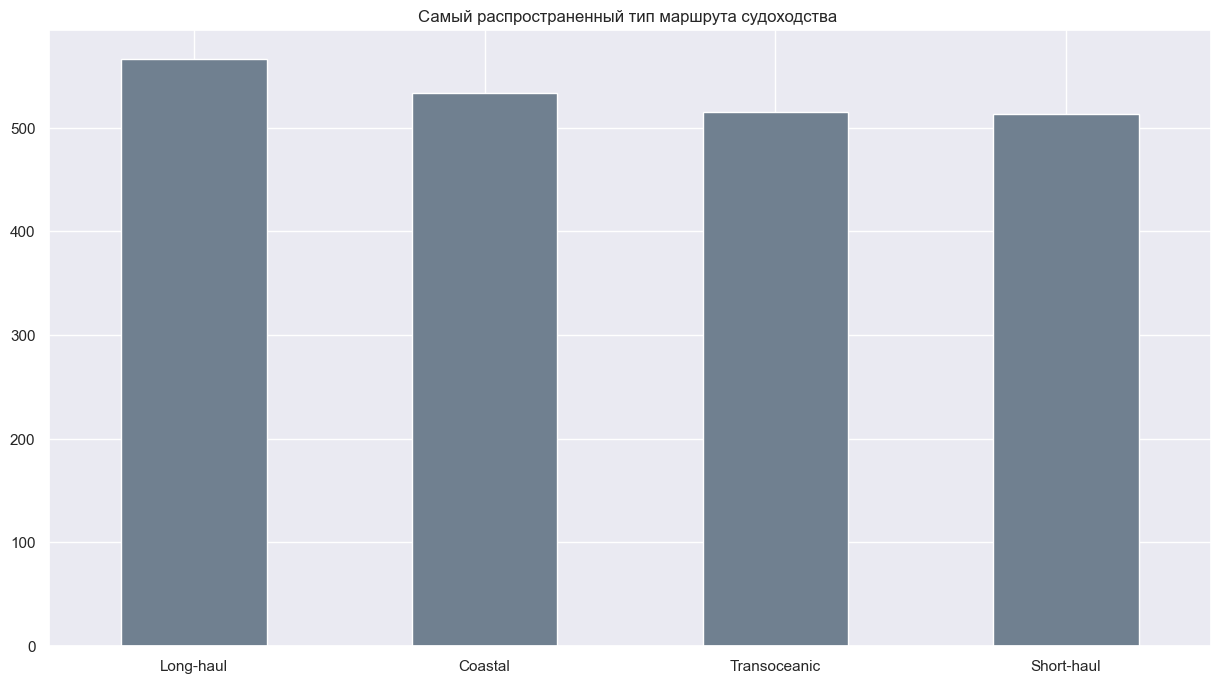

In [149]:
df['Route_Type'].value_counts().plot(kind='bar', title='Самый распространенный тип маршрута судоходства ', rot=0, color='slategray')

In [150]:
df.groupby('Engine_Type')['Efficiency_nm_per_kWh'].mean().reset_index()

,Engine_Type,Efficiency_nm_per_kWh
0,Diesel,0.776944
1,Heavy Fuel Oil (HFO),0.783596
2,Steam Turbine,0.809477


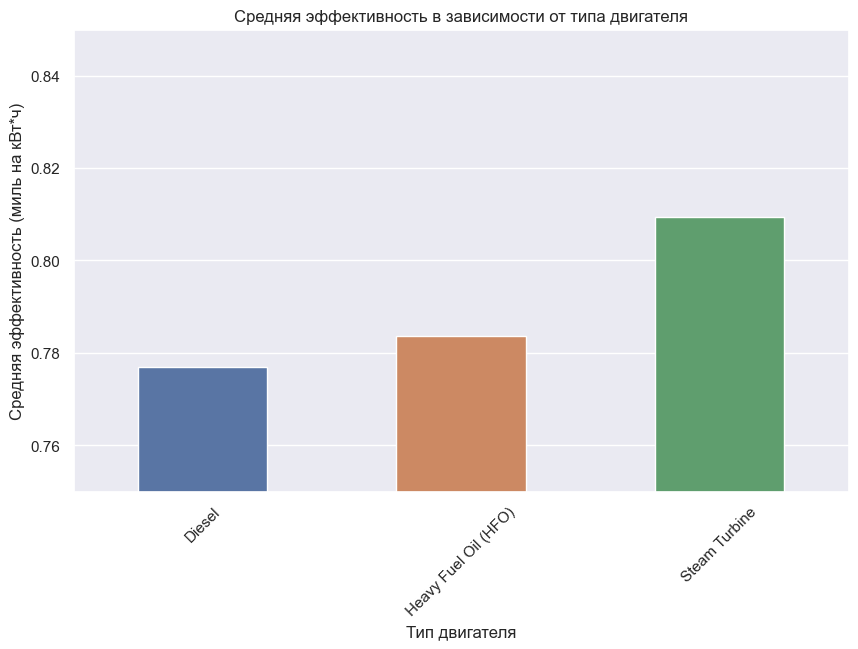

In [151]:
plt.figure(figsize=(10, 6))
sns.barplot(data=engine_type_avg, x='Engine_Type', y='Efficiency_nm_per_kWh', width=0.5).set_title('Средняя эффективность в зависимости от типа двигателя')
plt.ylim(0.75)
plt.xlabel('Тип двигателя')
plt.ylabel('Средняя эффективность (миль на кВт*ч)')
plt.xticks(rotation=45)
plt.show()

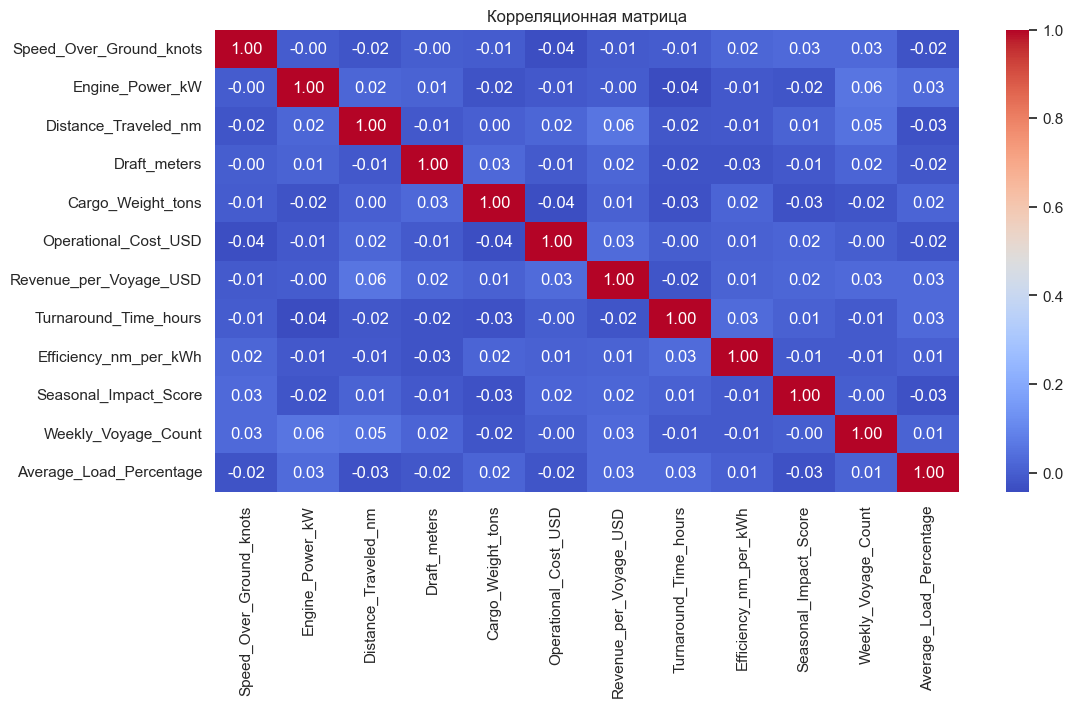

In [152]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляционная матрица")
plt.show()

In [153]:
df.groupby('Ship_Type').agg({'Revenue_per_Voyage_USD': 'mean', 'Operational_Cost_USD': 'mean'})

,Revenue_per_Voyage_USD,Operational_Cost_USD
Ship_Type,,
Bulk Carrier,523059.483355,255401.579222
Container Ship,524545.324828,261583.109697
Fish Carrier,534894.330363,259565.532213
Tanker,511477.552292,251794.733647


In [154]:
df.groupby('Engine_Type')['Engine_Power_kW'].mean()

Engine_Type
Diesel                  1750.678210
Heavy Fuel Oil (HFO)    1772.250668
Steam Turbine           1729.950885
Name: Engine_Power_kW, dtype: float64

In [155]:
df.groupby('Route_Type').agg({'Speed_Over_Ground_knots': 'mean'})

,Speed_Over_Ground_knots
Route_Type,
Coastal,17.655473
Long-haul,17.250361
Short-haul,17.855846
Transoceanic,17.699339


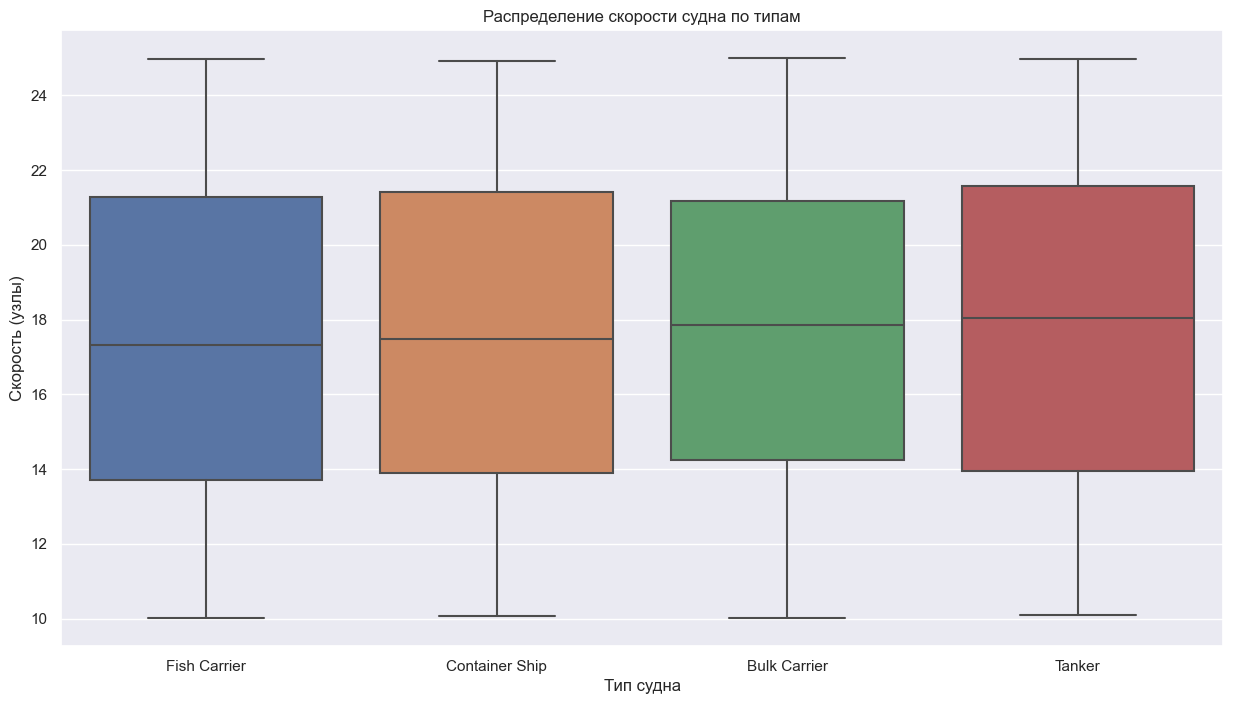

In [156]:
sns.boxplot(x='Ship_Type', y='Speed_Over_Ground_knots', data=df).set_title('Распределение скорости судна по типам')
plt.xlabel('Тип судна')
plt.ylabel('Скорость (узлы)')
plt.show()

In [157]:
engine_status_group = df.groupby('Engine_Type')['Revenue_per_Voyage_USD'].mean()
engine_status_group

Engine_Type
Diesel                  527545.013220
Heavy Fuel Oil (HFO)    520881.521079
Steam Turbine           521749.556341
Name: Revenue_per_Voyage_USD, dtype: float64

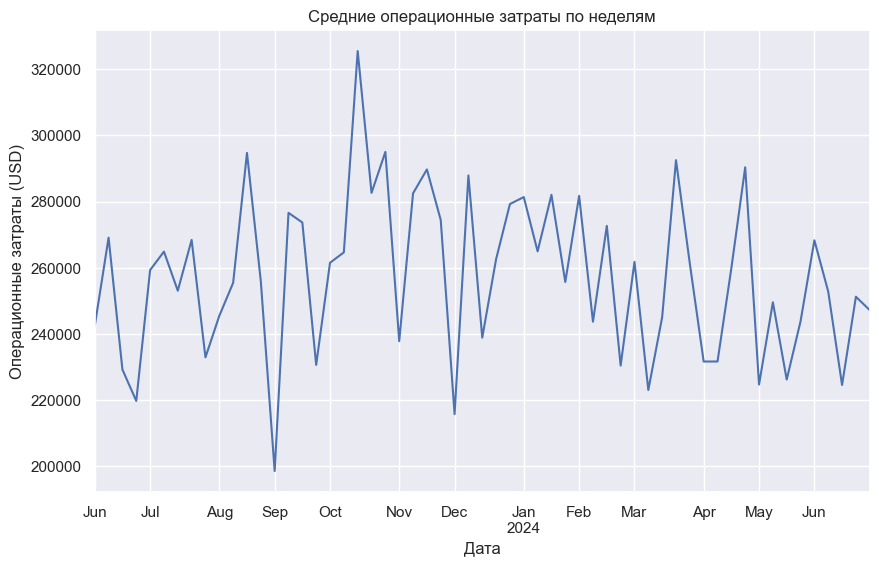

In [161]:
weekly_costs = df.groupby('Date')['Operational_Cost_USD'].mean().plot(figsize=(10, 6), title='Средние операционные затраты по неделям')
plt.xlabel('Дата')
plt.ylabel('Операционные затраты (USD)')
plt.show()

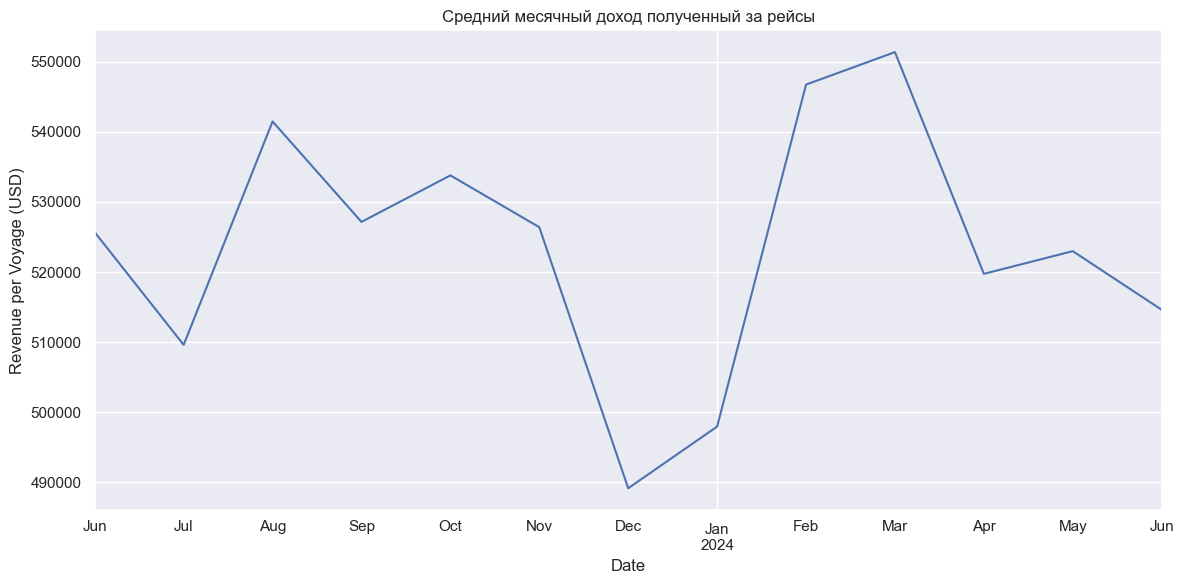

In [162]:
monthly_revenue = df['Revenue_per_Voyage_USD'].resample('M').mean()
plt.figure(figsize=(12, 6))
monthly_revenue.plot()
plt.title('Средний месячный доход полученный за рейсы')
plt.ylabel('Revenue per Voyage (USD)')
plt.tight_layout()
plt.show()

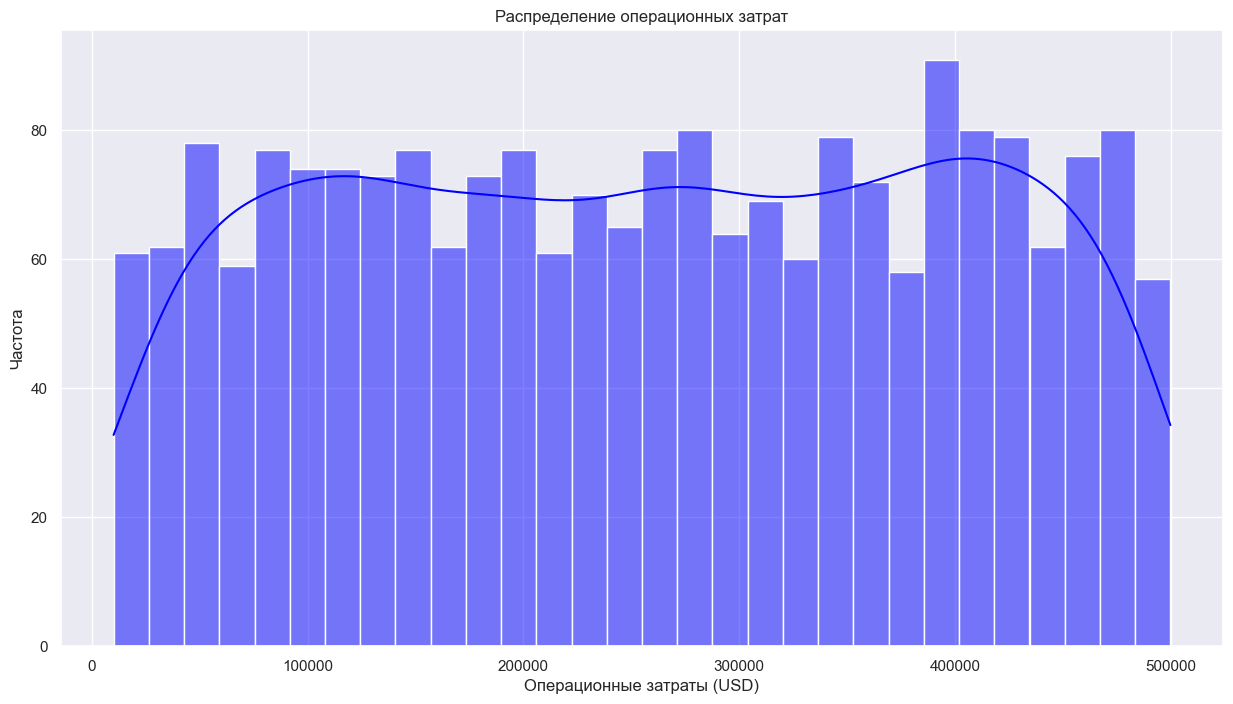

In [169]:
sns.histplot(df['Operational_Cost_USD'], kde=True, bins=30, color='blue').set_title('Распределение операционных затрат')
plt.xlabel('Операционные затраты (USD)')
plt.ylabel('Частота')
plt.show()

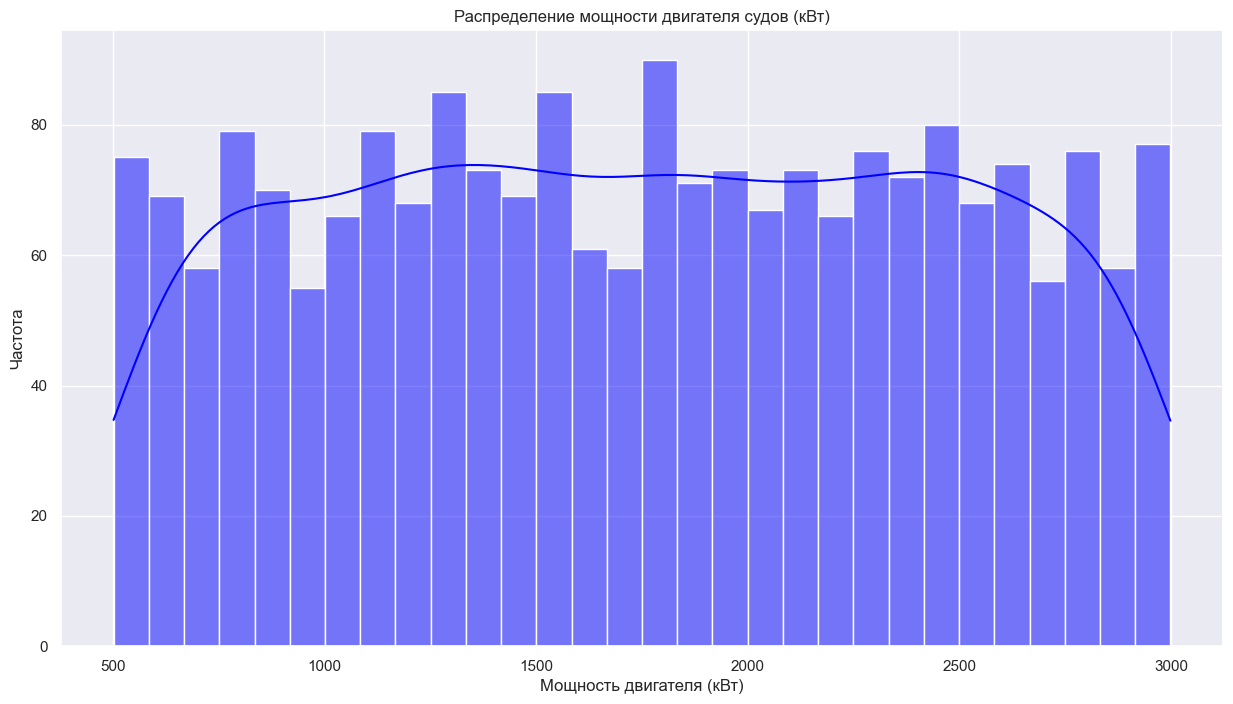

In [170]:
sns.histplot(df['Engine_Power_kW'], kde=True, bins=30, color='blue').set_title('Распределение мощности двигателя судов (кВт)')
plt.xlabel('Мощность двигателя (кВт)')
plt.ylabel('Частота')
plt.show()

In [171]:
engine_type_avg = df.groupby('Engine_Type')['Efficiency_nm_per_kWh'].mean().reset_index()
engine_type_avg

,Engine_Type,Efficiency_nm_per_kWh
0,Diesel,0.776944
1,Heavy Fuel Oil (HFO),0.783596
2,Steam Turbine,0.809477


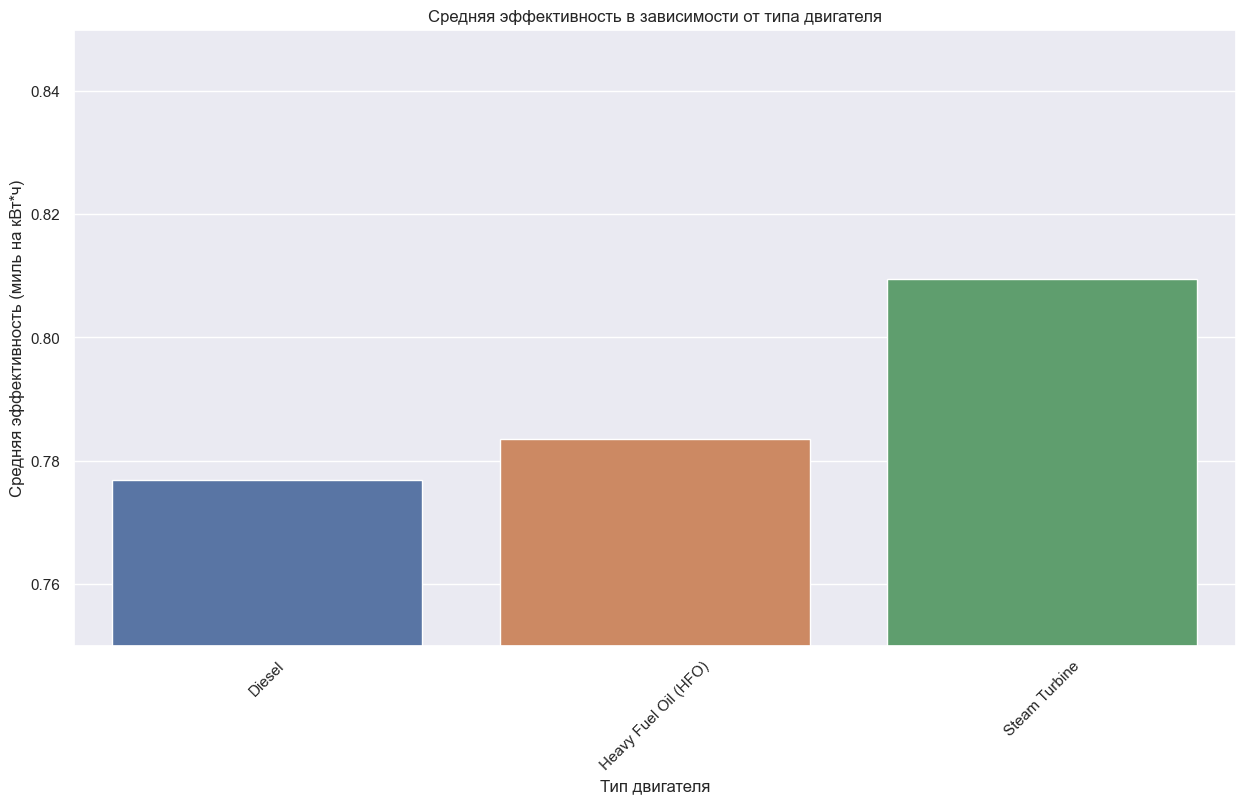

In [173]:
sns.barplot(data=engine_type_avg, x='Engine_Type', y='Efficiency_nm_per_kWh').set_title('Средняя эффективность в зависимости от типа двигателя')
plt.xlabel('Тип двигателя')
plt.ylabel('Средняя эффективность (миль на кВт*ч)')
plt.ylim(0.75)
plt.xticks(rotation=45)
plt.show()

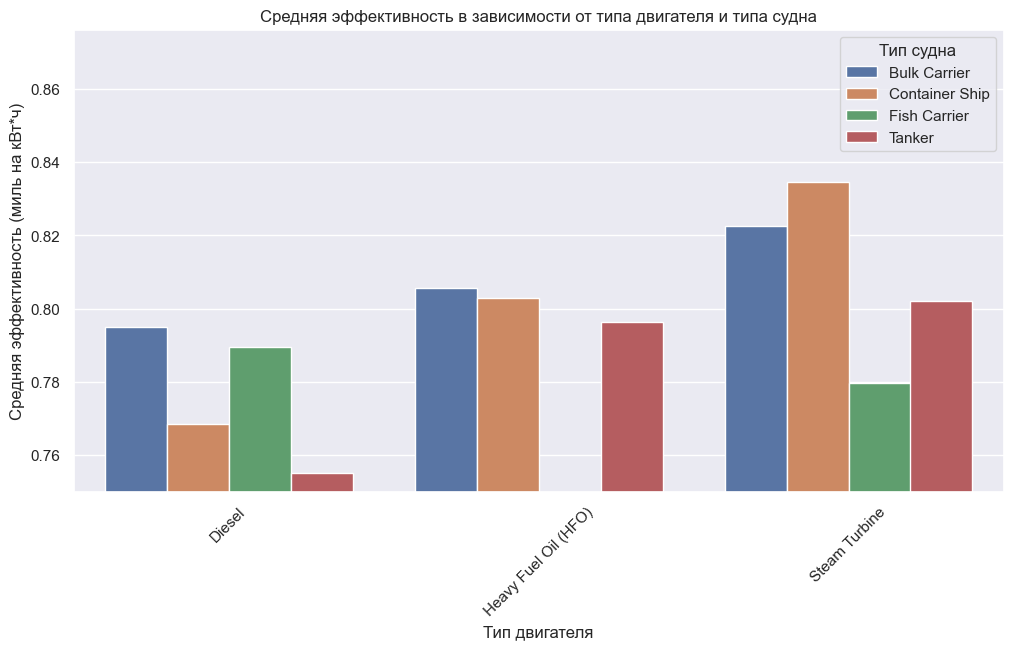

In [181]:
efficiency_avg = df.groupby(['Engine_Type', 'Ship_Type'])['Efficiency_nm_per_kWh'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=efficiency_avg, x='Engine_Type', y='Efficiency_nm_per_kWh', hue='Ship_Type')
plt.ylim(0.75)
plt.title('Средняя эффективность в зависимости от типа двигателя и типа судна')
plt.xlabel('Тип двигателя')
plt.ylabel('Средняя эффективность (миль на кВт*ч)')
plt.xticks(rotation=45)
plt.legend(title='Тип судна')

plt.show()

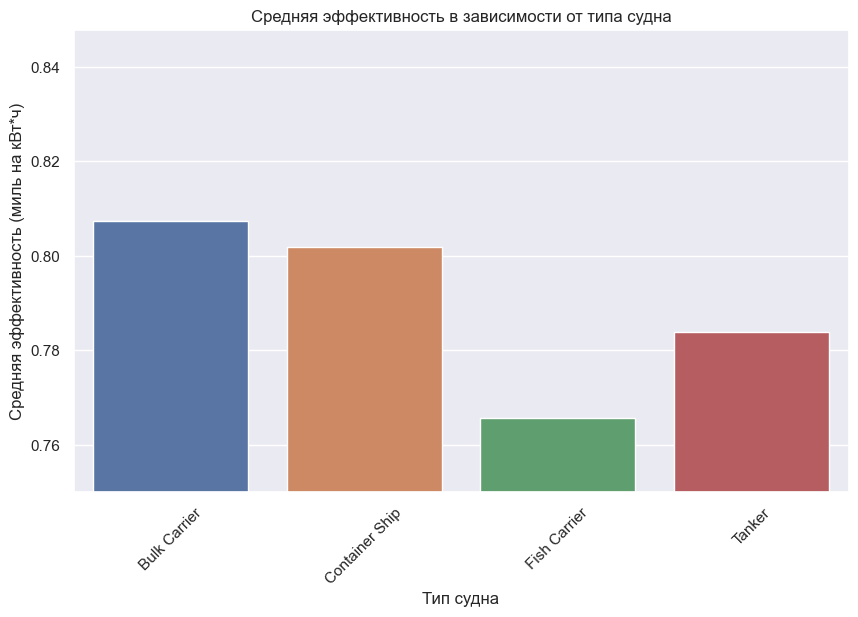

In [182]:
ship_type_avg = df.groupby('Ship_Type')['Efficiency_nm_per_kWh'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=ship_type_avg, x='Ship_Type', y='Efficiency_nm_per_kWh')
plt.ylim(0.75)
plt.title('Средняя эффективность в зависимости от типа судна')
plt.xlabel('Тип судна')
plt.ylabel('Средняя эффективность (миль на кВт*ч)')
plt.xticks(rotation=45)

plt.show()

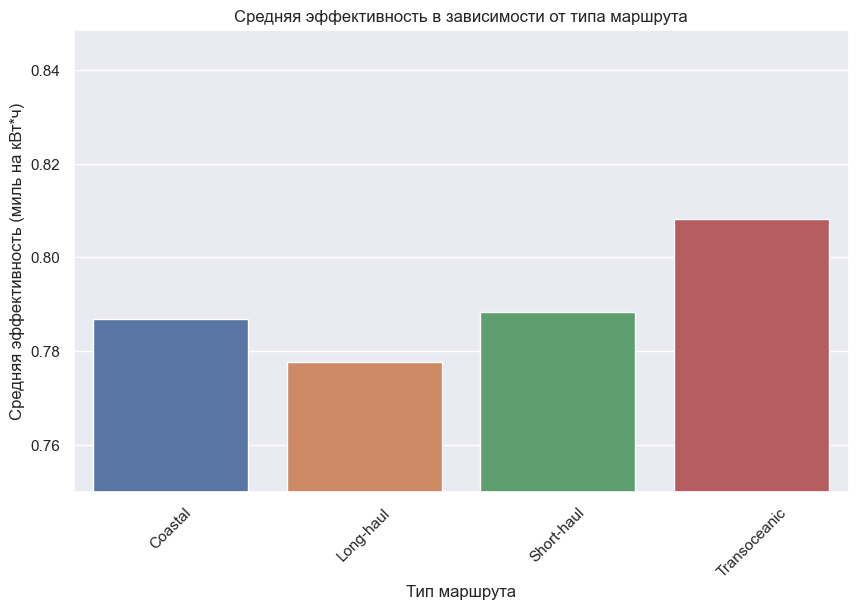

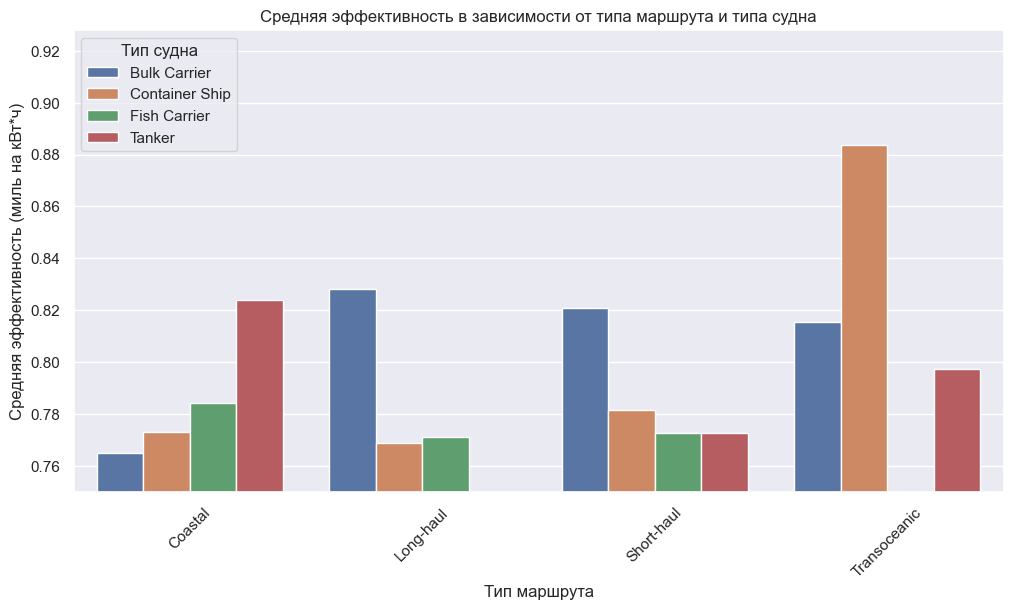

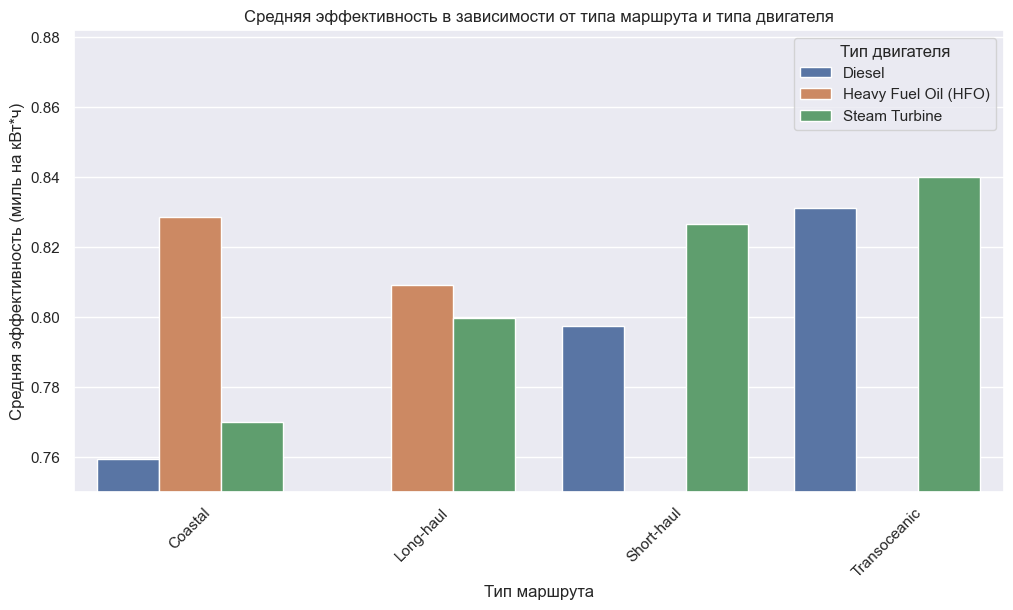

In [183]:
route_type_avg = df.groupby('Route_Type')['Efficiency_nm_per_kWh'].mean().reset_index()

route_ship_avg = df.groupby(['Route_Type', 'Ship_Type'])['Efficiency_nm_per_kWh'].mean().reset_index()

route_engine_avg = df.groupby(['Route_Type', 'Engine_Type'])['Efficiency_nm_per_kWh'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=route_type_avg, x='Route_Type', y='Efficiency_nm_per_kWh')
plt.ylim(0.75)
plt.title('Средняя эффективность в зависимости от типа маршрута')
plt.xlabel('Тип маршрута')
plt.ylabel('Средняя эффективность (миль на кВт*ч)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=route_ship_avg, x='Route_Type', y='Efficiency_nm_per_kWh', hue='Ship_Type')
plt.ylim(0.75)
plt.title('Средняя эффективность в зависимости от типа маршрута и типа судна')
plt.xlabel('Тип маршрута')
plt.ylabel('Средняя эффективность (миль на кВт*ч)')
plt.xticks(rotation=45)
plt.legend(title='Тип судна')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=route_engine_avg, x='Route_Type', y='Efficiency_nm_per_kWh', hue='Engine_Type')
plt.ylim(0.75)
plt.title('Средняя эффективность в зависимости от типа маршрута и типа двигателя')
plt.xlabel('Тип маршрута')
plt.ylabel('Средняя эффективность (миль на кВт*ч)')
plt.xticks(rotation=45)
plt.legend(title='Тип двигателя')
plt.show()


In [184]:
engine_type_avg

,Engine_Type,Efficiency_nm_per_kWh
0,Diesel,0.776944
1,Heavy Fuel Oil (HFO),0.783596
2,Steam Turbine,0.809477


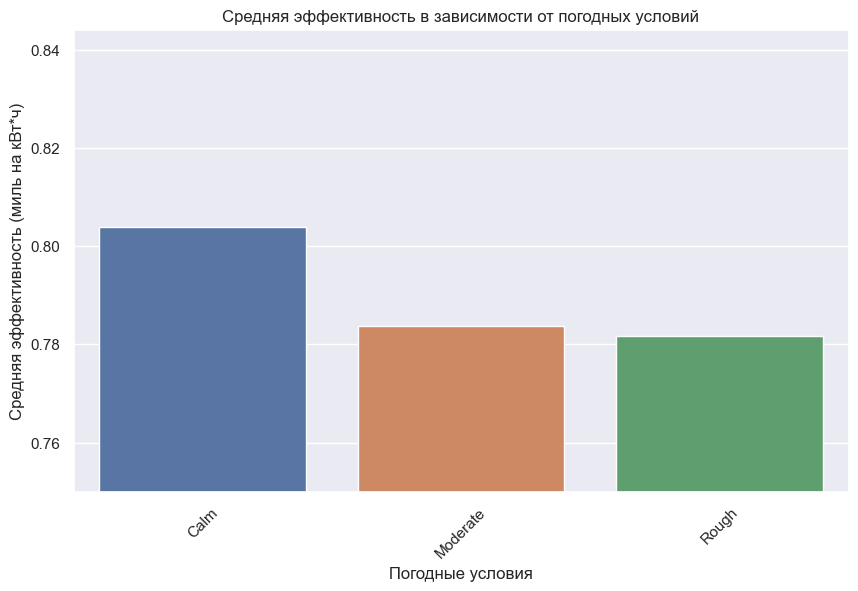

In [185]:
weather_condition_avg = df.groupby('Weather_Condition')['Efficiency_nm_per_kWh'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=weather_condition_avg, x='Weather_Condition', y='Efficiency_nm_per_kWh')
plt.ylim(0.75)
plt.title('Средняя эффективность в зависимости от погодных условий')
plt.xlabel('Погодные условия')
plt.ylabel('Средняя эффективность (миль на кВт*ч)')
plt.xticks(rotation=45)
plt.show()

In [186]:
weather_condition_avg

,Weather_Condition,Efficiency_nm_per_kWh
0,Calm,0.803851
1,Moderate,0.783670
2,Rough,0.781649


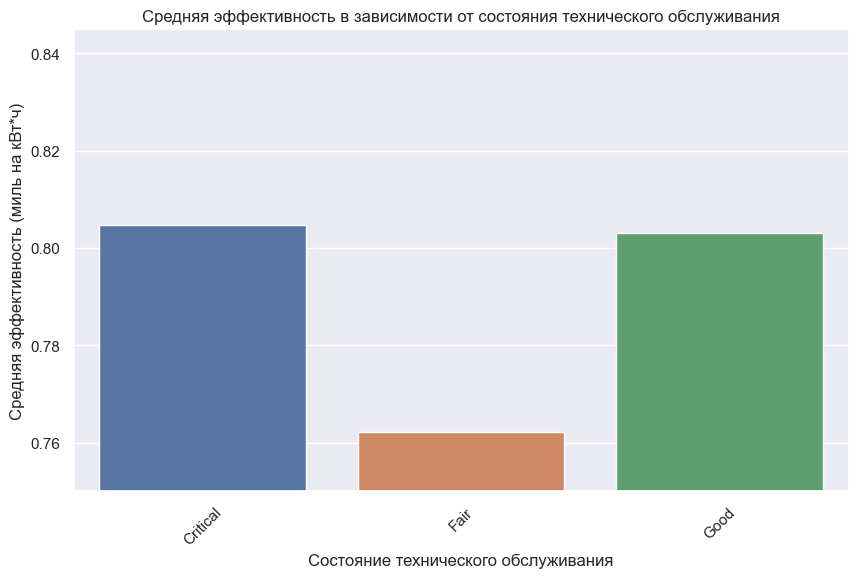

In [187]:
maintenance_status_avg = df.groupby('Maintenance_Status')['Efficiency_nm_per_kWh'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=maintenance_status_avg, x='Maintenance_Status', y='Efficiency_nm_per_kWh')
plt.ylim(0.75)
plt.title('Средняя эффективность в зависимости от состояния технического обслуживания')
plt.xlabel('Состояние технического обслуживания')
plt.ylabel('Средняя эффективность (миль на кВт*ч)')
plt.xticks(rotation=45)
plt.show()

In [188]:
maintenance_status_avg

,Maintenance_Status,Efficiency_nm_per_kWh
0,Critical,0.804694
1,Fair,0.762141
2,Good,0.803103


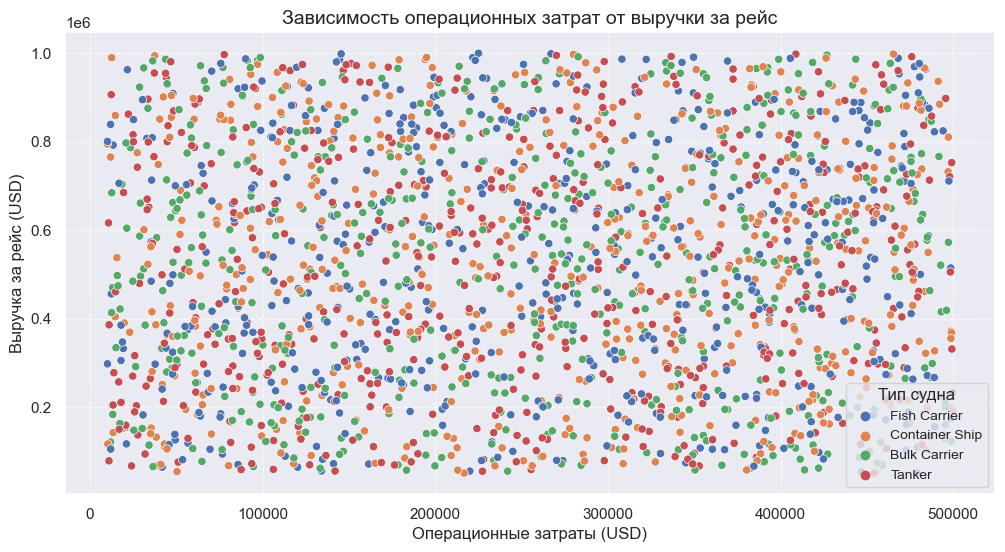

In [189]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Operational_Cost_USD', y='Revenue_per_Voyage_USD', hue='Ship_Type')

plt.title('Зависимость операционных затрат от выручки за рейс', fontsize=14)
plt.xlabel('Операционные затраты (USD)', fontsize=12)
plt.ylabel('Выручка за рейс (USD)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Тип судна", fontsize=10, title_fontsize=12)

plt.show()